# Data Visualization Using NYC Subway Entry and Exit Data
Dataset download link for reference: https://www.kaggle.com/kalilurrahman/newyork-subway-entry-exit-dataset-for-dataviz
Shape file download for railroads and roads: https://www.statsilk.com/maps/download-free-shapefile-maps
Shape file download for outline of land: https://gadm.org/download_country_v3.html
geopandas allows for processing of shape files to plot maps

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [2]:
DATA_FILE = 'rows.csv'      # NYC subway data
SHAPE_FILE = gpd.read_file('USA_roads.shp')
SHAPE_FILE_TWO = gpd.read_file('gadm36_USA_1.shp')

## Creating functions to load the data from the csv file and save plots

In [3]:
def load_data():
    csv_file = pd.read_csv(DATA_FILE)
    return csv_file

In [4]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = fig_id + "." + fig_extension
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Loading and Preprocessing the data

### Subset and print descriptions of the data

In [13]:
subway_df = load_data()
subway_df = subway_df[["Division", "Line", "Station Name", "Station Latitude", "Station Longitude"]]
display(subway_df.head())
print('-' * 100)
subway_df.info()

,Division,Line,Station Name,Station Latitude,Station Longitude
0,BMT,4 Avenue,25th St,40.660397,-73.998091
1,BMT,4 Avenue,25th St,40.660397,-73.998091
2,BMT,4 Avenue,36th St,40.655144,-74.003549
3,BMT,4 Avenue,36th St,40.655144,-74.003549
4,BMT,4 Avenue,36th St,40.655144,-74.003549


----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Division           1868 non-null   object 
 1   Line               1868 non-null   object 
 2   Station Name       1868 non-null   object 
 3   Station Latitude   1868 non-null   float64
 4   Station Longitude  1868 non-null   float64
dtypes: float64(2), object(3)
memory usage: 73.1+ KB


### Group data by Division and Line attributes to get counts for bar charts

In [14]:
div_count = subway_df.groupby('Division').agg('count').reset_index()
div_count

,Division,Line,Station Name,Station Latitude,Station Longitude
0,BMT,442,442,442,442
1,IND,726,726,726,726
2,IRT,700,700,700,700


In [11]:
line_count = subway_df.groupby('Line').agg('count').reset_index()
line_count.head()

,Line,Division,Station Name,Station Latitude,Station Longitude
0,4 Avenue,52,52,52,52
1,42nd St Shuttle,8,8,8,8
2,6 Avenue,121,121,121,121
3,63rd Street,11,11,11,11
4,8 Avenue,183,183,183,183


### Get a panda series of counts for Line attribute to use for sorting and add it the dataframe

In [15]:
line_count_series = subway_df.groupby('Line')['Line'].transform('count')

In [16]:
subway_df = subway_df.assign(line_count=line_count_series.values)
subway_df.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,line_count
0,BMT,4 Avenue,25th St,40.660397,-73.998091,52
1,BMT,4 Avenue,25th St,40.660397,-73.998091,52
2,BMT,4 Avenue,36th St,40.655144,-74.003549,52
3,BMT,4 Avenue,36th St,40.655144,-74.003549,52
4,BMT,4 Avenue,36th St,40.655144,-74.003549,52


# Making the Plots

### Scatter plots of locations of subway stations

Saving figure location_scatter_color_division


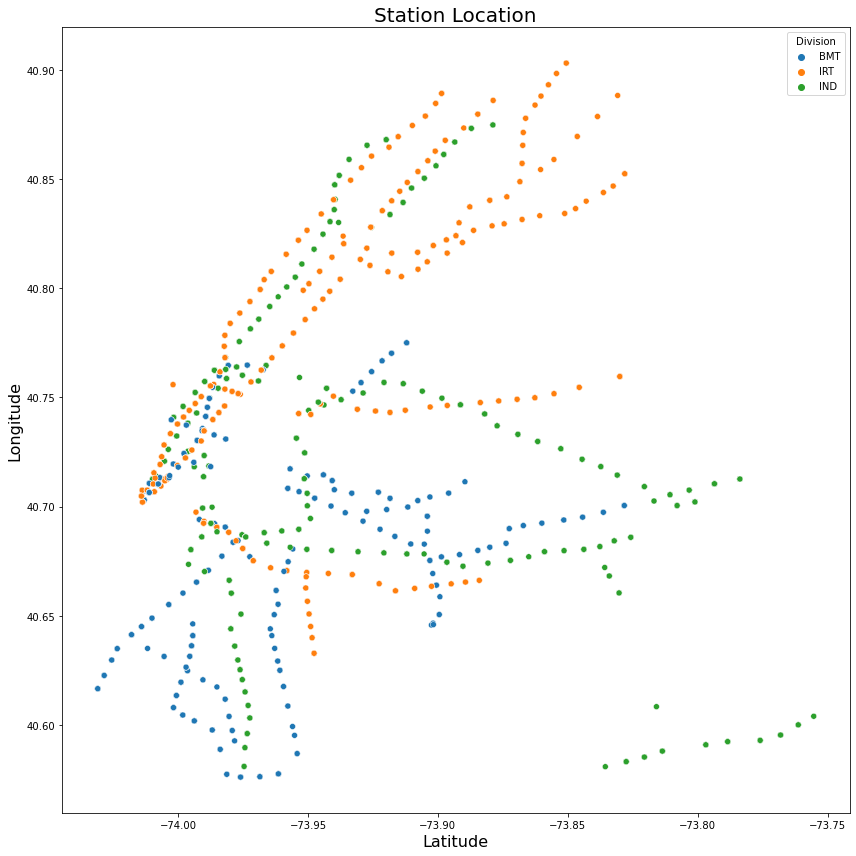

In [19]:
x = subway_df['Station Longitude']
y = subway_df['Station Latitude']
sort_hue = subway_df['Division']
plt.figure(figsize=(12, 12))
sns.scatterplot(x=x, y=y, hue=sort_hue)
plt.title("Station Location", fontsize=20)
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Longitude", fontsize=16)
save_fig(fig_id="location_scatter_color_division")
plt.show(block=False)
plt.pause(1)                     # Opens the window for 1 second before closing it
plt.close("all")

Saving figure location_scatter_color_line


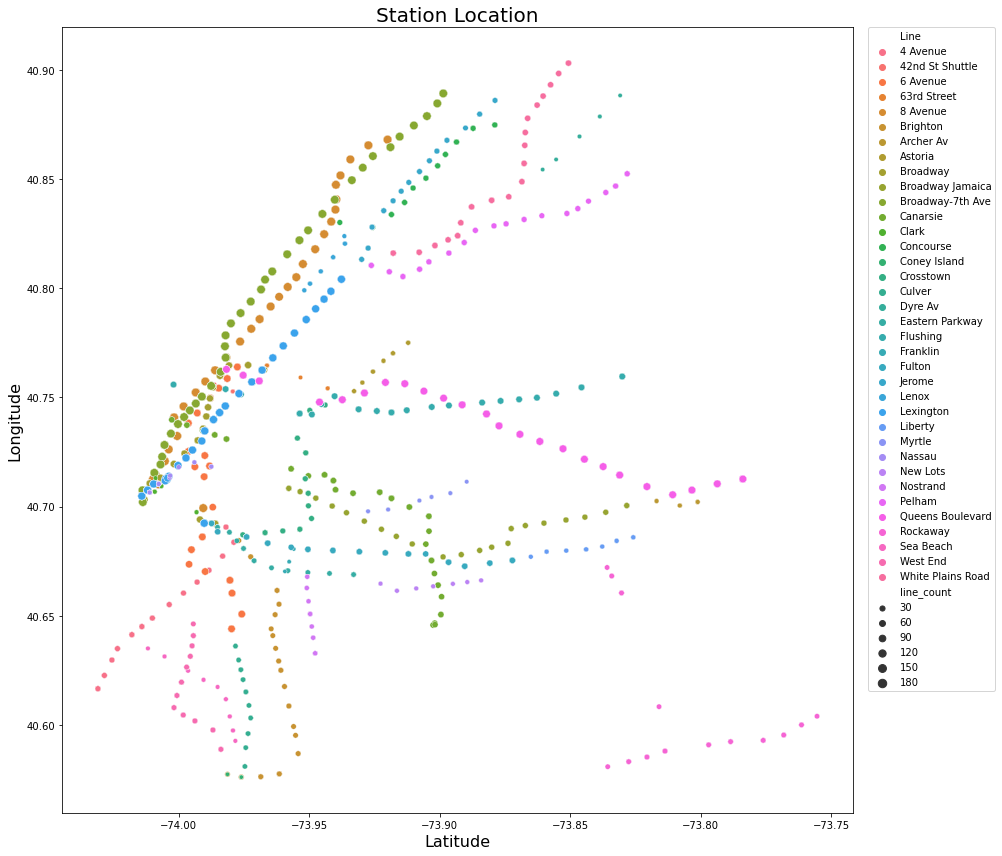

In [21]:
x = subway_df['Station Longitude']
y = subway_df['Station Latitude']
sort_hue = subway_df['Line']
sort_size = subway_df['line_count']
plt.figure(figsize=(14, 12))
sns.scatterplot(x=x, y=y, hue=sort_hue, size=sort_size)
plt.title("Station Location", fontsize=20)
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Longitude", fontsize=16)
plt.legend(bbox_to_anchor=(1.18, 1), borderaxespad=0)
save_fig(fig_id="location_scatter_color_line")
plt.show(block=False)
plt.pause(1)
plt.close("all")

### Bar charts of number of entries by Division and Line

Saving figure division_barchart


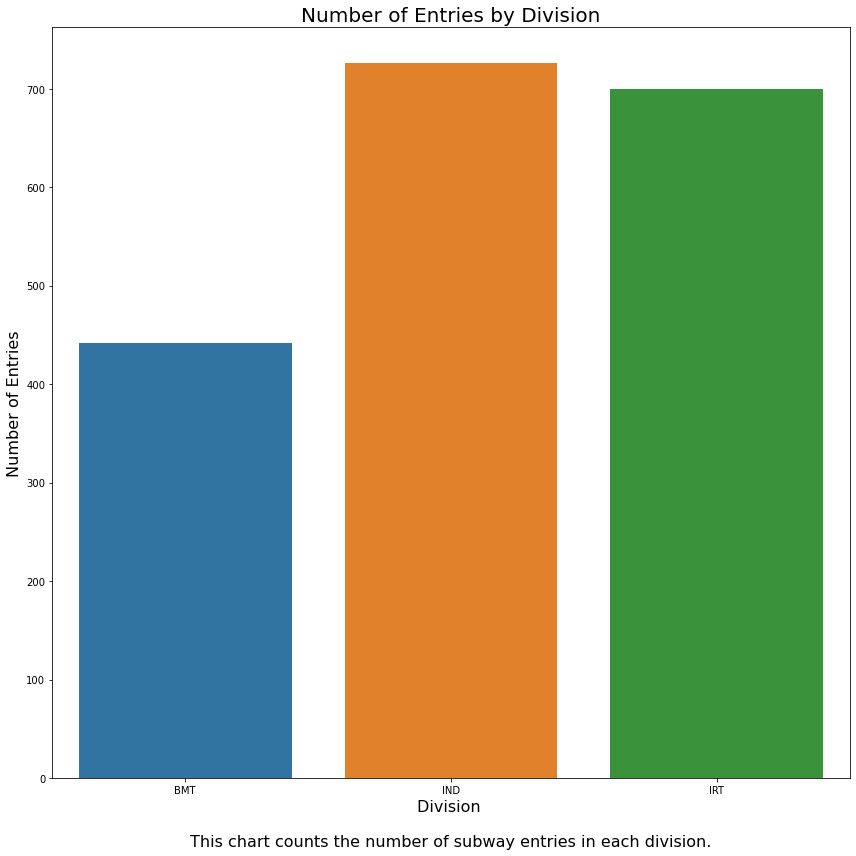

In [23]:
x = div_count['Division']
y = div_count['Line']
plt.figure(figsize=(12, 12))
sns.barplot(x=x, y=y)
plt.title("Number of Entries by Division", fontsize=20)
plt.xlabel("Division \n\n"
           "This chart counts the number of subway entries in each division.", fontsize=16)
plt.ylabel("Number of Entries", fontsize=16)
save_fig(fig_id="division_barchart")
plt.show(block=False)
plt.pause(1)                        # Opens the window for 1 second before closing it
plt.close("all")

Saving figure line_barchart


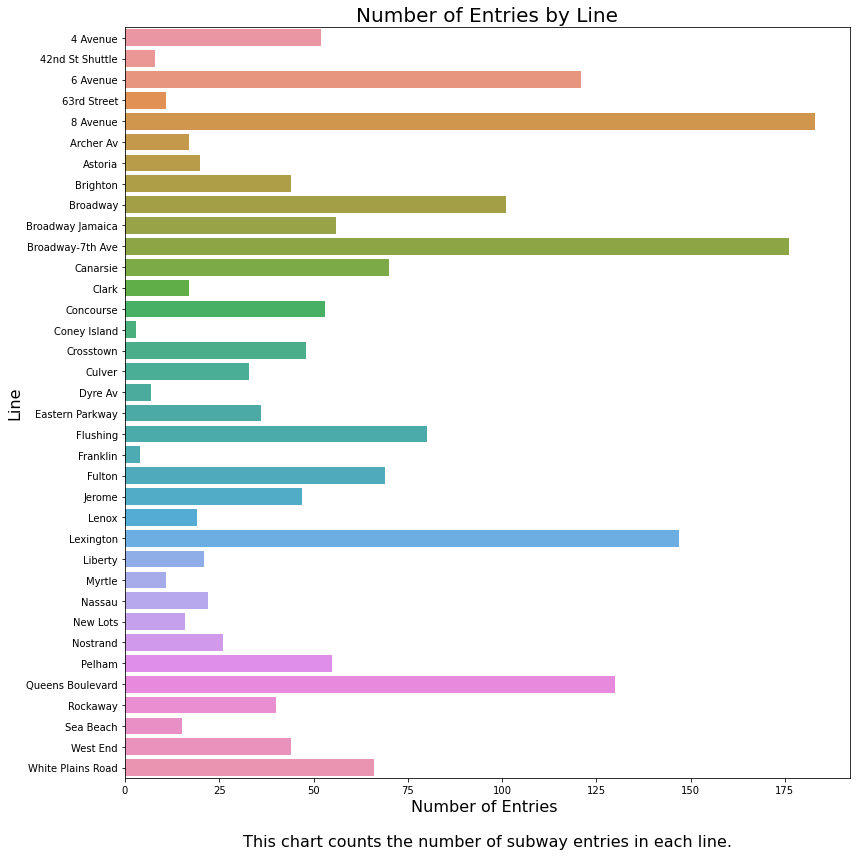

In [25]:
x = line_count['Division']
y = line_count['Line']
plt.figure(figsize=(12, 12))
sns.barplot(x=x, y=y)
plt.title("Number of Entries by Line", fontsize=20)
plt.xlabel("Number of Entries \n\n"
           "This chart counts the number of subway entries in each line.", fontsize=16)
plt.ylabel("Line", fontsize=16)
save_fig(fig_id="line_barchart")
plt.show(block=False)
plt.pause(1)                    # Opens the window for 1 second before closing it
plt.close("all")

### Scatter plots plotted over maps of NYC area

Saving figure geo_chart


C:\Users\JOSEPH~1\AppData\Local\Temp/ipykernel_18868/1335338376.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


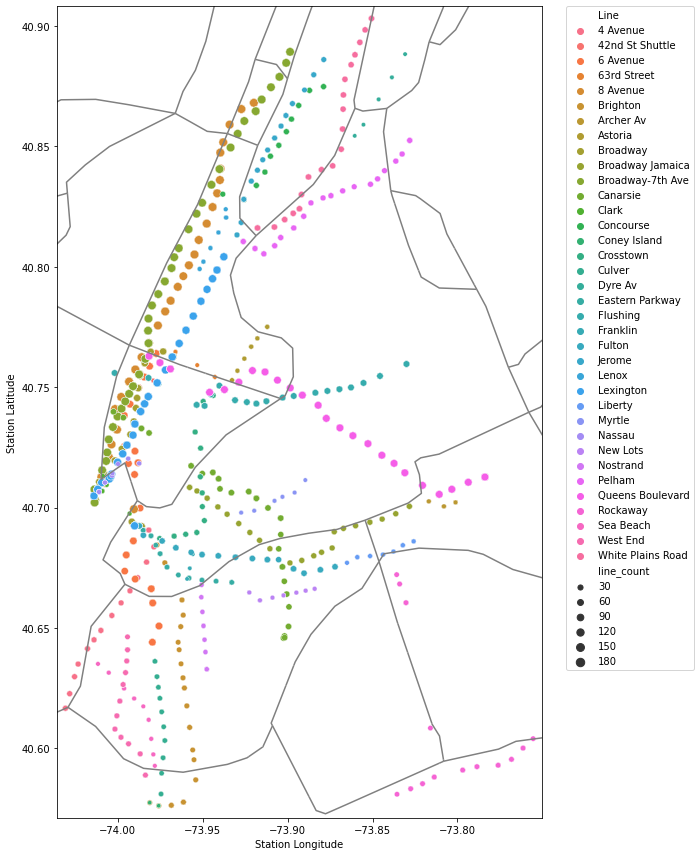

In [29]:
street_map = SHAPE_FILE
# Creates bounds for the shape file
bbox = (subway_df['Station Longitude'].min(), subway_df['Station Longitude'].max(),
        subway_df['Station Latitude'].min(), subway_df['Station Latitude'].max())
x = subway_df['Station Longitude']
y = subway_df['Station Latitude']
sort_hue = subway_df['Line']
sort_size = subway_df['line_count']

fig, ax = plt.subplots(figsize=(12, 12))
street_map.plot(ax=ax, color='grey')
ax.set_xlim(bbox[0] - 0.005, bbox[1] + 0.005)
ax.set_ylim(bbox[2] - 0.005, bbox[3] + 0.005)
sns.scatterplot(x=x, y=y, hue=sort_hue, size=sort_size, ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0)
save_fig(fig_id="geo_chart")
fig.show()

Saving figure geo_chart(1)


C:\Users\JOSEPH~1\AppData\Local\Temp/ipykernel_18868/3783369937.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


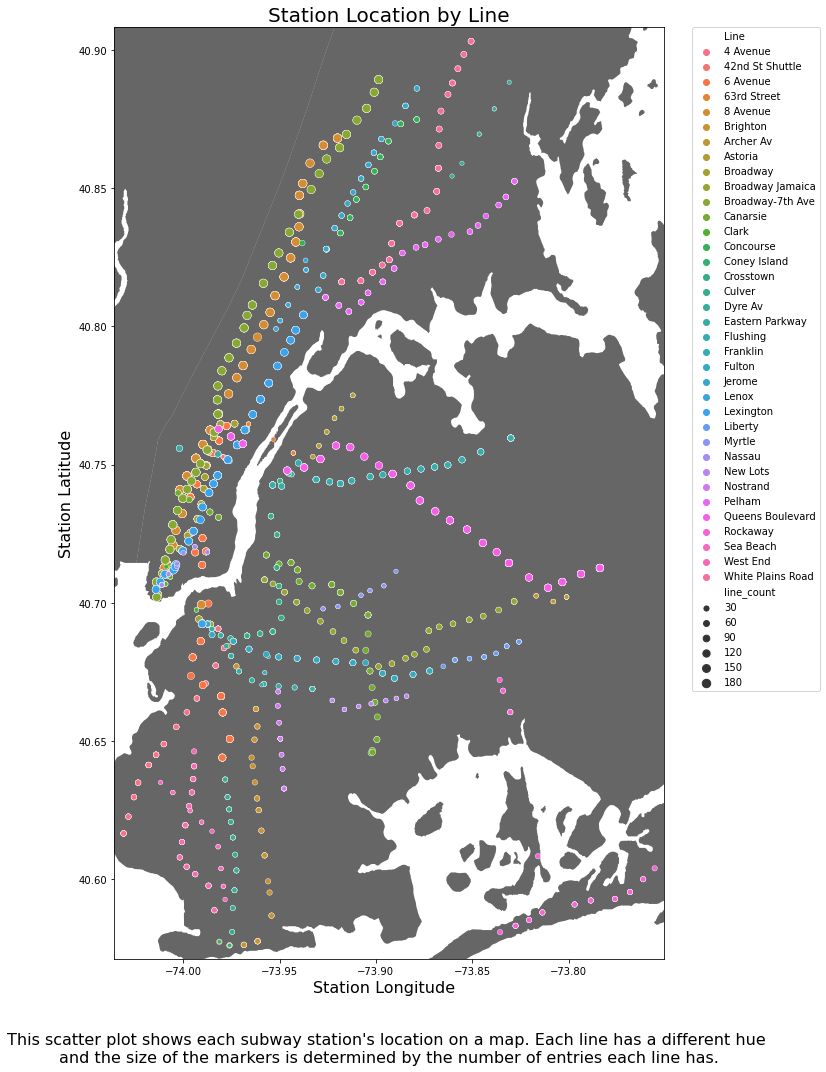

In [30]:
street_map = SHAPE_FILE_TWO
# Creates bounds for the shape file
bbox = (subway_df['Station Longitude'].min(), subway_df['Station Longitude'].max(),
        subway_df['Station Latitude'].min(), subway_df['Station Latitude'].max())
x = subway_df['Station Longitude']
y = subway_df['Station Latitude']
sort_hue = subway_df['Line']
sort_size = subway_df['line_count']

fig, ax = plt.subplots(figsize=(12, 15))
street_map.plot(ax=ax, color='black', alpha=0.6)
ax.set_xlim(bbox[0] - 0.005, bbox[1] + 0.005)
ax.set_ylim(bbox[2] - 0.005, bbox[3] + 0.005)
sns.scatterplot(x=x, y=y, hue=sort_hue, size=sort_size, ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0)
ax.set_xlabel("Station Longitude  \n\n\n"
              "This scatter plot shows each subway station's location on a map. Each line has a different hue \n"
              "and the size of the markers is determined by the number of entries each line has.",
              fontsize=16)
ax.set_ylabel("Station Latitude", fontsize=16)
ax.set_title("Station Location by Line", fontsize=20)
save_fig(fig_id="geo_chart(1)")
fig.show()

Saving figure geo_chart(2)


C:\Users\JOSEPH~1\AppData\Local\Temp/ipykernel_18868/262346652.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


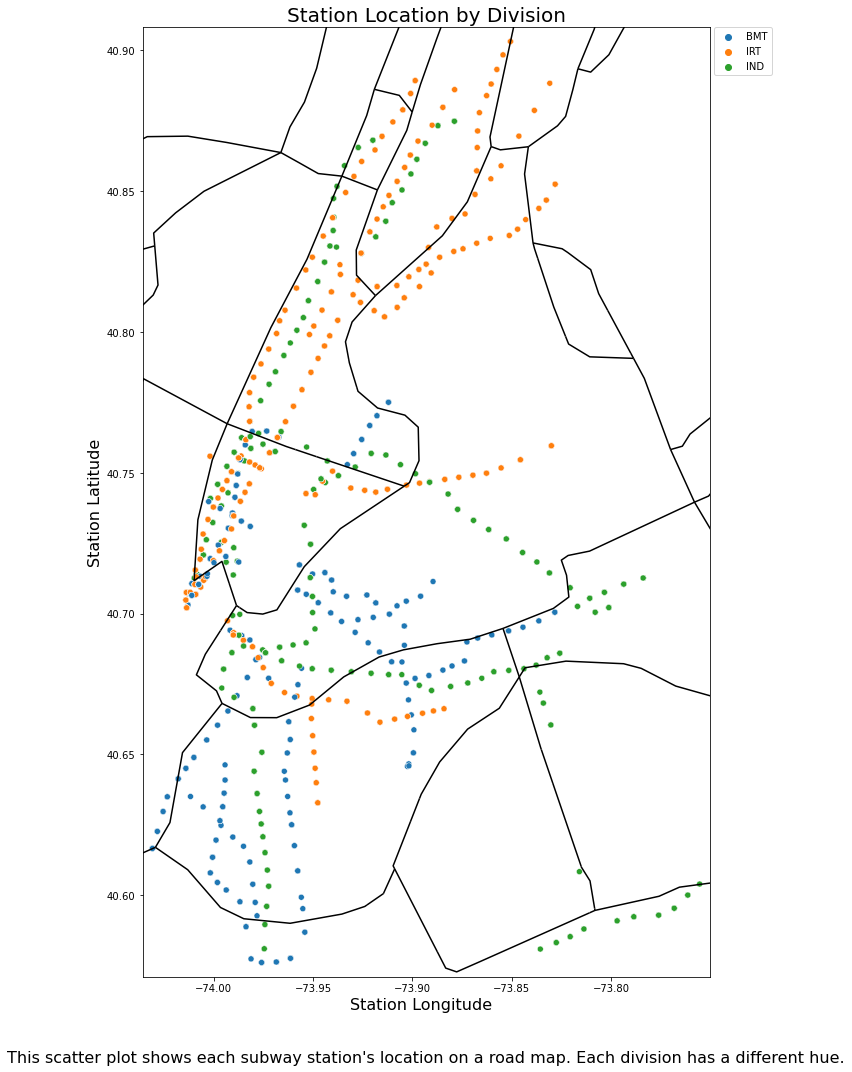

In [32]:
street_map = SHAPE_FILE
# Creates bounds for the shape file
bbox = (subway_df['Station Longitude'].min(), subway_df['Station Longitude'].max(),
        subway_df['Station Latitude'].min(), subway_df['Station Latitude'].max())
x = subway_df['Station Longitude']
y = subway_df['Station Latitude']
sort_hue = subway_df['Division']

fig, ax = plt.subplots(figsize=(12, 15))
street_map.plot(ax=ax, color='black')
ax.set_xlim(bbox[0] - 0.005, bbox[1] + 0.005)
ax.set_ylim(bbox[2] - 0.005, bbox[3] + 0.005)
sns.scatterplot(x=x, y=y, hue=sort_hue, ax=ax)
ax.legend(bbox_to_anchor=(1.11, 1), borderaxespad=0)
ax.set_xlabel("Station Longitude  \n\n\n"
              "This scatter plot shows each subway station's location on a road map. Each division has a different "
              "hue.",
              fontsize=16)
ax.set_ylabel("Station Latitude", fontsize=16)
ax.set_title("Station Location by Division", fontsize=20)
save_fig(fig_id="geo_chart(2)")
fig.show()